- In **late September 2016**, **scikit-learn version 0.18** was released.  
  A small change was made:
   * The `train_test_split` function is now imported from `model_selection` instead of `cross_validation`.

- Old code:  
    from sklearn.cross_validation import train_test_split

- New code:  
    from sklearn.model_selection import train_test_split

<br>

- **We'll use the new method**
  - using older method sends a **warning message** about the update.
  - The same change happened for `GridSearchCV` (covered later).




---

# 🎈 Introduction to Linear Regression

This introduction provides a light theoretical background and historical context for the idea of **linear regression** before exploring its implementation using Python and the scikit-learn library. 
- For deeper mathematical understanding: **Chapters 2 and 3 of *An Introduction to Statistical Learning*** By _Gareth James, et al_. 


### **History of Linear Regression (Regression to the Mean):**

* The concept of **regression** originated in the **1800s** with **Francis Galton**.

* Galton studied the relationship between **parents and their children**, focusing mainly on the **heights of fathers and their sons**.

* He observed that while **tall fathers usually had tall sons**, the sons' heights were typically **closer to the average height** of the general population, rather than exactly matching their fathers.

* This tendency for values to _move closer to the overall average_ is what Galton termed **“regression to the mean.”**

* His work laid the foundation for what we now call **linear regression**, a technique used to model the relationship between a _dependent variable_ and one or more _independent variables_.


* **Example:**  
  Consider **Shaquille O’Neal**, a famous NBA player known for being very tall — **7 ft 1 in (2.2 meters)**.

    * **If Shaq has a son**, it’s likely his son would also be tall because of genetics.

    * However, because **Shaq’s height is an extreme value (an outlier)**, there’s a good chance his son’s height would be **closer to the population average** rather than matching his father’s height.

    * In fact, **Shaq’s real son is 6 ft 7 in**, tall but still shorter than Shaq.

    * **Francis Galton called this phenomenon "regression"** — meaning that extreme characteristic (like very tall or very short heights) in parents tend to **move back toward the population average**.  
    
    * An extreme characteristic in one generation tends to move closer to the mean in subsequent generations.  

    * This example helps explain the basic idea of **"regression to the mean"** in statistics.

---





> ## ---  rev[25-Jun-2025]  ----


#### Historical Background



#### Concept of Linear Regression

The basic idea behind linear regression is to model the relationship between a dependent variable and one or more independent variables by fitting a straight line to observed data points. The goal is to find a line that is as close as possible to all the data points, minimizing the differences between the actual data values and the predicted values made by the line.

A simple example involves only two data points: one at (x = 2, y = 4) and another at (x = 5, y = 10). With just these two points, a perfect line can be drawn through both. However, the real value of regression lies in applying this technique to larger datasets, where predictions can be made for new, unlabeled data based on learned patterns.

#### The Role in Supervised Learning

In supervised learning, a model is built from labeled data. In the context of regression, the model learns the relationship between the input features (such as a father's height) and the target variable (the son's height). Once trained, the model can then predict outcomes for new data points. The objective is to minimize the **vertical distance (errors or residuals)** between the predicted values (on the regression line) and the actual data points.

#### Minimizing Error: Least Squares Method

Various methods exist for measuring and minimizing these differences, including the **sum of squared errors** and **sum of absolute errors**. One of the most widely used techniques is the **least squares method**, which minimizes the sum of the squares of the residuals — the differences between actual observed values and the values predicted by the regression line.

In a regression plot, data points are displayed along the x and y axes. The regression line is drawn through the data, and the residuals are the vertical distances from each data point to the line. These residuals are squared and summed, and the line that produces the smallest total is selected as the best fit.

---


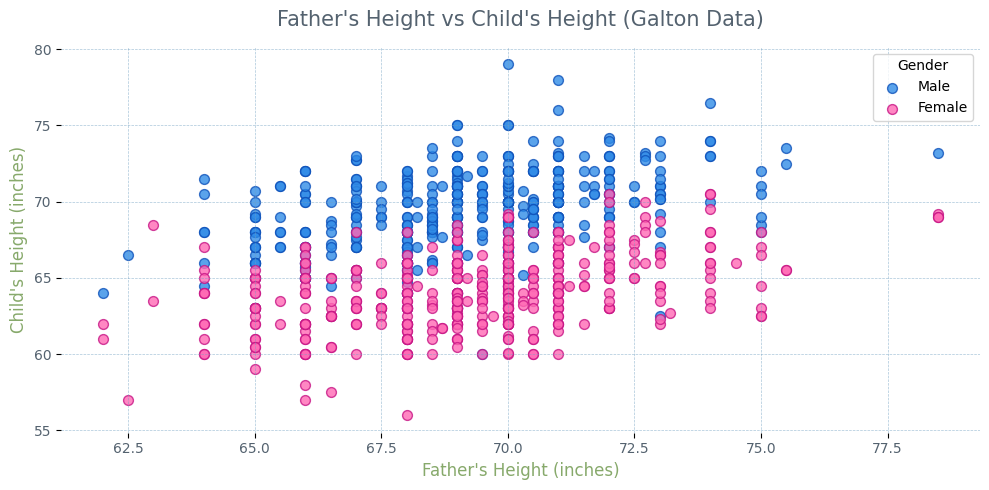

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("galton.csv")

# Modern font settings
plt.rcParams["font.family"] = "DejaVu Sans"

# Filter by gender
male_df = df[df["gender"] == "male"]
female_df = df[df["gender"] == "female"]

# Create the scatterplot
plt.figure(figsize=(10, 5))

# Male points
plt.scatter(male_df["father"], male_df["childHeight"],
            color="#318CE7", edgecolors='#0F52BA',
            s=50, alpha=0.8, label='Male')

# Female points
plt.scatter(female_df["father"], female_df["childHeight"],
            color="#FF69B4", edgecolors='#C71585',
            s=50, alpha=0.8, label='Female')

# Title and axis labels
plt.title("Father's Height vs Child's Height (Galton Data)",
          fontsize=15, color="#54626f", pad=15)
plt.xlabel("Father's Height (inches)", fontsize=12, color="#87a96b")
plt.ylabel("Child's Height (inches)", fontsize=12, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add legend
plt.legend(title="Gender", fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()


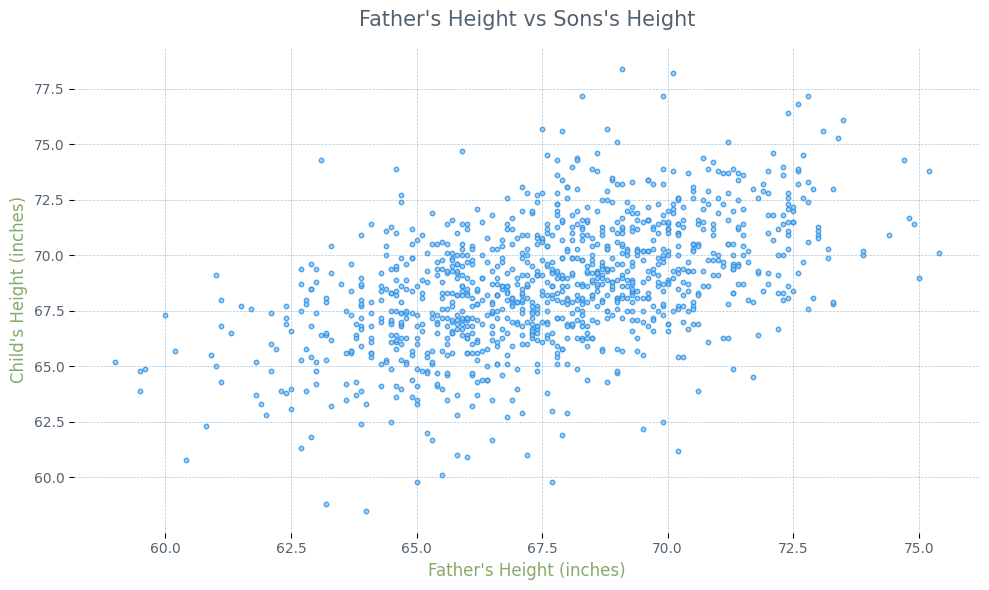

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data into Python envrionmnet 
data = np.loadtxt('Pearson.txt')
# Getting height of only Father
father_height = data[:,0]
father_height = father_height.reshape(father_height.shape[0], 1)
# Getting height of only Son
son_height = data[:,1]
son_height = son_height.reshape(son_height.shape[0], 1)


# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(father_height, son_height, 
            color="#89cff0", edgecolors='#318ce7', 
            s=10, alpha=0.8)

# Title and axis labels
plt.title("Father's Height vs Sons's Height", fontsize=15, color="#54626f", pad=15)
plt.xlabel("Father's Height (inches)", fontsize=12, color="#87a96b")
plt.ylabel("Child's Height (inches)", fontsize=12, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Save as SVG
# plt.savefig("sat_scores_scatter_modern.svg", format="svg")

# Optional: show the plot
plt.show()